<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/Tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
## Building Model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Import File dan Baca Dataset
data = pd.read_csv("dataset.csv")
data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [33]:
#Cek Nilai Null dan Outlier
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000  

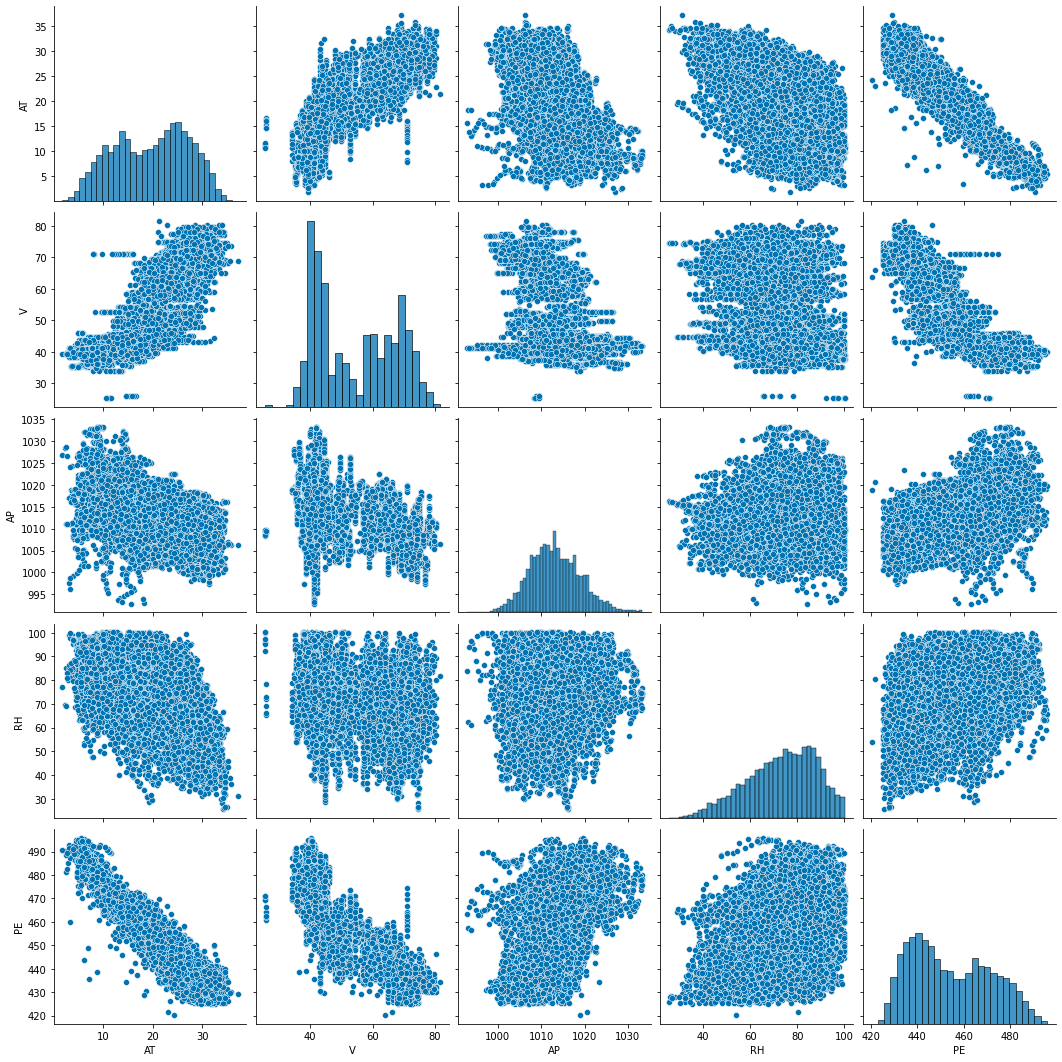

In [34]:
#Plot Hubungan Antar Variabel
sns.set_palette('colorblind')
sns.pairplot(data=data, height=3)

In [35]:
#Menentukan Variabel Dependen dan Independen
X = data.drop(['PE'],axis=1).values
Y = data['PE'].values

In [36]:
#Menampilkan Variabel Independen
print(X)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [37]:
#Menampilkan Variabel Dependen
print(Y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


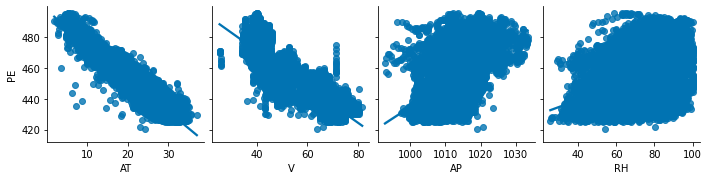

In [38]:
#Plot Hubungan Variabel Dependen dan Independen
sns.pairplot(data, 
             x_vars=['AT', 'V', 'AP', 'RH'],
             y_vars=['PE'],
             kind='reg')

In [39]:
#Pembagian Dataset Menjadi Data Train dan Data Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [40]:
#Melatih Model pada Train Set
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [41]:
#Menampilkan Nilai Intercept dan Coefficients
print('Intercept:', mlr.intercept_)
print('Coefficients:', mlr.coef_)

Intercept: 448.5306714055785
Coefficients: [-1.9797936  -0.23300225  0.06812315 -0.15839461]


In [42]:
#Melakukan Prediksi pada Test Set
y_prediksi = mlr.predict(x_test)
print(y_prediksi)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


In [43]:
#Test Model pada Data Ke-2
mlr.predict([[23.64, 58.49, 1011.4,74.2]])
#Pengujian dengan Rumus
(23.64*-1.9797936)+(58.48*-0.23300225)+(1011.4*0.06812315)+(74.2*-0.15839461)+448.5306714055785

445.2492529695785

In [44]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_prediksi)
meanSqErr = metrics.mean_squared_error(y_test, y_prediksi)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_prediksi))
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.87
Mean Absolute Error: 3.6145667311908336
Mean Square Error: 20.60318130208776
Root Mean Square Error: 4.539072735932721


In [45]:
#Nilai Aktual, Nilai Prediksi, dan Selisih Nilai
perbandingan = pd.DataFrame({"Nilai Aktual":y_test,"Nilai Prediksi":y_prediksi,"Selisih Nilai":y_test-y_prediksi})
perbandingan

,Nilai Aktual,Nilai Prediksi,Selisih Nilai
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
...,...,...,...
2866,440.27,443.739019,-3.469019
2867,438.42,442.129053,-3.709053
2868,442.88,444.058091,-1.178091
2869,456.64,459.347457,-2.707457


Text(0.5, 1.0, 'Perbandingan Nilai Aktual dan Nilai Prediksi')

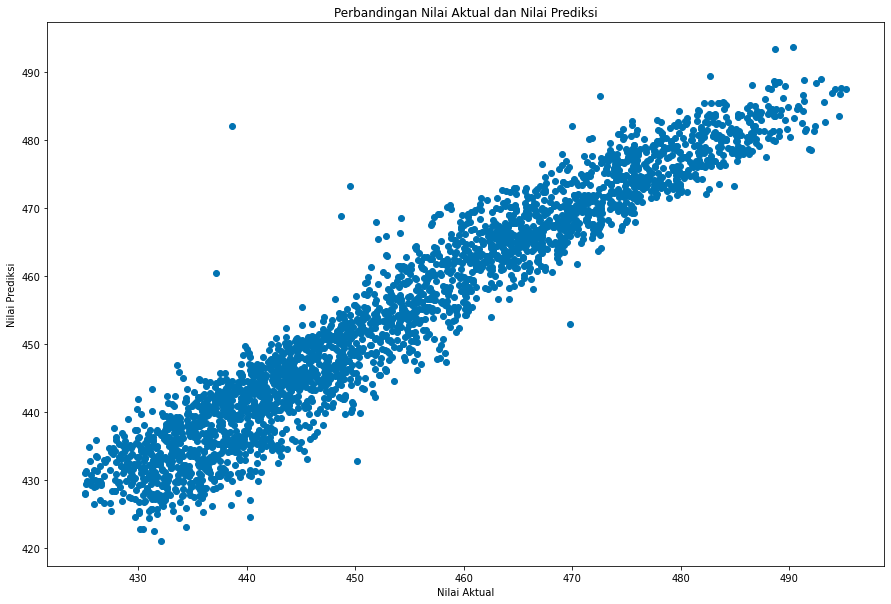

In [46]:
#Plot Perbandingan Nilai Aktual dan Prediksi
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_prediksi)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Perbandingan Nilai Aktual dan Nilai Prediksi")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


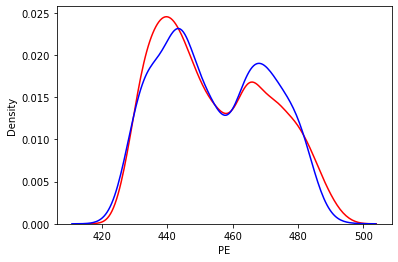

In [47]:
a = sns.distplot(data['PE'], hist=False, color='r', label='Nilai Aktual')
sns.distplot(y_prediksi, hist=False, color='b', label='Nilai Prediksi', ax=a)

In [48]:
#Mengecek Validasi Model
X = sm.add_constant(X) 

olsmod = sm.OLS(Y, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:43:12   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [49]:
#Nilai R Square (Koofisien Determinasi)
print('R2 score:', olsmod.rsquared)

R2 score: 0.9286960898122536


In [50]:
#Uji Nova
print('F-statistic:', olsmod.fvalue)
print('Probabilitas mengamati nilai setidaknya setinggi F-statistik:', olsmod.f_pvalue)

F-statistic: 31138.266763667652
Probabilitas mengamati nilai setidaknya setinggi F-statistik: 0.0


In [51]:
#Ujit T
print(olsmod.pvalues)

[0.00000000e+000 0.00000000e+000 4.37530536e-215 5.50710885e-011
 3.10458442e-293]


In [52]:
#Menampilkan Prediksi dan Residu
data['pe_pred'] = olsmod.predict(X)
data['residu'] = olsmod.resid
data.head()

,AT,V,AP,RH,PE,pe_pred,residu
0,8.34,40.77,1010.84,90.01,480.48,477.109516,3.370484
1,23.64,58.49,1011.40,74.20,445.75,445.242168,0.507832
2,29.74,56.90,1007.15,41.91,438.76,438.390979,0.369021
3,19.07,49.69,1007.22,76.79,453.09,455.669000,-2.579000
4,11.80,40.66,1017.13,97.20,464.43,469.547144,-5.117144


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


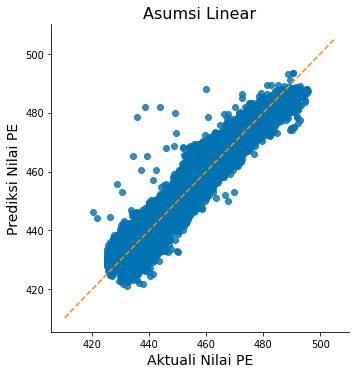

In [53]:
#Linearitas
# Plot Untuk Nilai Sekarang dan Nilai Prediksi
sns.lmplot(x='PE', y='pe_pred', data=data, fit_reg=False, size=5)
    
# Plotting garis diagonal
line_coords = np.arange(data[['PE', 'pe_pred']].min().min()-10, 
                        data[['PE', 'pe_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Prediksi Nilai PE', fontsize=14)
plt.xlabel('Aktuali Nilai PE', fontsize=14)
plt.title('Asumsi Linear', fontsize=16)
plt.show()

Matriks koefisien korelasi pearson masing-masing variabel:
           PE        AT         V        AP        RH
PE  1.000000 -0.948128 -0.869780  0.518429  0.389794
AT -0.948128  1.000000  0.844107 -0.507549 -0.542535
V  -0.869780  0.844107  1.000000 -0.413502 -0.312187
AP  0.518429 -0.507549 -0.413502  1.000000  0.099574
RH  0.389794 -0.542535 -0.312187  0.099574  1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


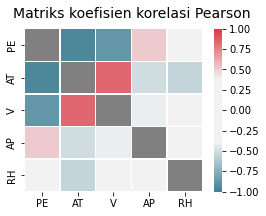

In [54]:
#Multikolinieritas
corr = data[['PE', 'AT', 'V', 'AP', 'RH']].corr()
print('Matriks koefisien korelasi pearson masing-masing variabel:\n', corr)

mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

fig, ax = plt.subplots(figsize=(4, 3))

cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Matriks koefisien korelasi Pearson', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

In [55]:
#Autokorelasi
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(data['residu'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Tanda-tanda autokorelasi positif', '\n')
    print('Asumsi tidak terpenuhi')
elif durbinWatson > 2.5:
    print('Tanda-tanda autokorelasi negatif', '\n')
    print('Asumsi tidak terpenuhi')
else:
    print('Sedikit atau tidak ada autokorelasi', '\n')
    print('Asumsi terpenuhi')

Durbin-Watson: 1.9938672193790345
Sedikit atau tidak ada autokorelasi 

Asumsi terpenuhi


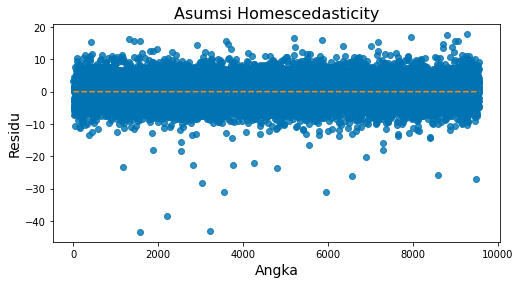

In [56]:
# Plot residu
plt.subplots(figsize=(8, 4))
plt.scatter(x=data.index, y=data.residu, alpha=0.8)
plt.plot(np.repeat(0, len(data.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residu', fontsize=14)
plt.xlabel('Angka', fontsize=14)
plt.title('Asumsi Homescedasticity', fontsize=16)
plt.show()  